# 预测指标

- 通货膨胀CPI
- 股票市场风险Variance
- 股票换手率Turnover
- 股票市盈率、股息率、市帐比、市净率、市销率Price Earnings Ratio


In [33]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy

import statsmodels.formula.api as smf

import matplotlib.pyplot as plt #画图模块
import matplotlib.dates as mdates #日期格式处理模块
from matplotlib import style #用来自定义图表风格的模块

#magic command
%matplotlib inline
%config InlineBackend.figure_format='svg' #提高分辨率

from matplotlib.font_manager import FontProperties #画图自定义字体
from pylab import mpl #画图自定义字体
mpl.rcParams['font.sans-serif']=['SimHei'] #指定默认字体

In [34]:
#导入数据
data=pd.read_csv('E:/Python Github HW/ZhaoQy/000001-24.9.30.csv')
data['Day']=pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day',inplace=True)
data['Close']=pd.to_numeric(data['Close'],errors='coerce')
data['Preclose']=data['Close'].shift(1)  #实现数据平移，向下移动一行数据
data['Return']=(data['Close']-data['Preclose'])/data['Preclose']
data

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Return
Day,,,,,,,,
1990-12-19,NaN,96.050,99.980,95.790,99.980,126000.00,4.940000e+05,NaN
1990-12-20,99.980,104.300,104.390,99.980,104.390,19700.00,8.400000e+04,0.044109
1990-12-21,104.390,109.070,109.130,103.730,109.130,2800.00,1.600000e+04,0.045407
1990-12-24,109.130,113.570,114.550,109.130,114.550,3200.00,3.100000e+04,0.049666
1990-12-25,114.550,120.090,120.250,114.550,120.250,1500.00,6.000000e+03,0.049760
...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131


In [35]:
data_new=data['1995-01':'2024-09'].copy() #深复制
data_new['Close']=pd.to_numeric(data_new['Close'])
data_new['Preclose']=pd.to_numeric(data_new['Preclose'])
#计算上证指数日收益率
data_new['Raw_return']=data_new['Close']/data_new['Preclose']-1
data_new

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Return,Raw_return
Day,,,,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,23451800.00,1.806930e+08,-0.012333,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,42222000.00,3.069230e+08,0.021770,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,43012300.00,3.015330e+08,-0.010584,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,48748200.00,3.537580e+08,-0.009476,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,50985100.00,3.985190e+08,-0.023035,-0.023035
...,...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131,0.036131


In [36]:
Month_data=data_new.resample('ME')['Raw_return'].apply(lambda x:(1+x).prod()-1).to_frame()
Month_data

,Raw_return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


# 通货膨胀CPI

按多个列进行排序
- sort_values(by=['A','B'])   :按照A、B对数据进行排序

In [37]:
inflation=pd.read_csv('E:/Python Github HW/ZhaoQy/inflation.csv')
inflation['month']=pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month',inplace=True)
inflation.sort_values(by=['month'],axis=0,ascending=True)


,cpi
month,
1987-01-31,5.1
1987-02-28,5.4
1987-03-31,5.8
1987-04-30,6.7
1987-05-31,7.6
...,...
2024-05-31,0.3
2024-06-30,0.2
2024-07-31,0.5


同比：over year (eg. 2024.9 & 2023.9)

# Inflation图片

C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_27576\4267405315.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-r" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(inflation['cpi'], #图片数据
C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_27576\4267405315.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-r" (-> marker='.'). The keyword argument will take precedence.
  ax.plot(inflation['cpi'], #图片数据
C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_27576\4267405315.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".-r" (-> color='r'). The keyword argument will take precedence.
  ax.plot(inflation['cpi'], #图片数据


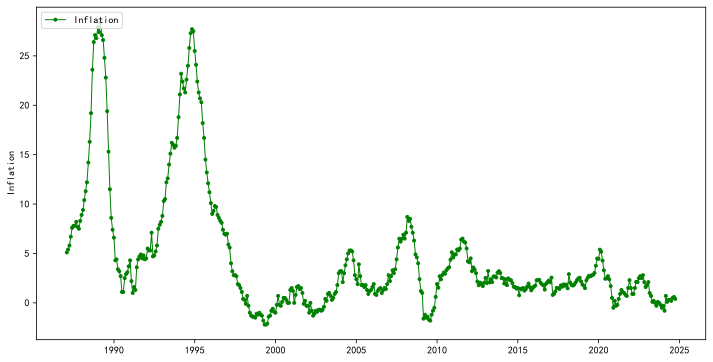

In [38]:
fig,ax=plt.subplots(figsize=(12,6))#选择图形大小

ax.plot(inflation['cpi'], #图片数据
    '.-r',#图片类型，
    color='g',#图片颜色
    label='Inflation',#图片标签
    linewidth=1,
    linestyle='-',
    marker='.')#图片线宽
ax.set_ylabel('Inflation')
#添加图例
ax.legend(loc='upper left',fontsize=10)
plt.show();

## Inflation和Return一起作图

按照索引合并数据

In [39]:
reg_data=pd.merge(Month_data,inflation,left_index=True,right_index=True)
reg_data

,Raw_return,cpi
1995-01-31,-0.131631,24.1
1995-02-28,-0.023694,22.4
1995-03-31,0.177803,21.3
1995-04-30,-0.103552,20.7
1995-05-31,0.207922,20.3
...,...,...
2024-05-31,-0.005801,0.3
2024-06-30,-0.038684,0.2
2024-07-31,-0.009656,0.5
2024-08-31,-0.032849,0.6


绘制多子图：fig,ax=plt.subplots(a,b)
- a：行，b：列
- fig：相当于一个大的画布
- ax：相当于小的子图——单个图表任何操作在axes对象上进行

C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_27576\2749605649.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-r" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(reg_data['Raw_return'], #图片数据
C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_27576\2749605649.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-r" (-> marker='.'). The keyword argument will take precedence.
  ax1.plot(reg_data['Raw_return'], #图片数据
C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_27576\2749605649.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".-r" (-> color='r'). The keyword argument will take precedence.
  ax1.plot(reg_data['Raw_return'], #图片数据
C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_27576\2749605649.py:22: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-r" (-> line

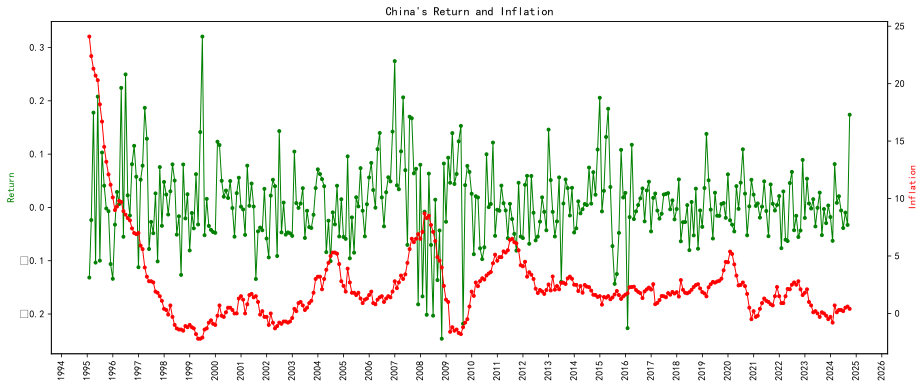

In [40]:
fig,ax1=plt.subplots(figsize=(15,6))#选择图形大小

ax1.plot(reg_data['Raw_return'], #图片数据
    '.-r',#图片类型，
    color='g',#图片颜色
    label='Return',#图片标签
    linewidth=1,
    linestyle='-',
    marker='.')
ax1.set_ylabel('Return',color='g')

#设置x轴的日期显示格式
data_format=mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
#转制x轴的日期显示格式
plt.xticks(rotation=90)

#在画好的单y轴上添加另一条y轴，即建立双y轴
ax2=ax1.twinx()

ax2.plot(reg_data['cpi'], #图片数据
    '.-r',#图片类型，
    color='r',#图片颜色
    label='Inflation',#图片标签
    linewidth=1,
    linestyle='-',
    marker='.')
ax2.set_ylabel('Inflation',color='r')

plt.title("China's Return and Inflation")

lines,labels=ax1.get_legend_handles_labels()
lines2,labels2=ax2.get_legend_handles_labels()
ax.legend(lines+lines2,labels+labels2,loc='upper right')

plt.show()




# 经济学假设

$$
R_t=\alpha+\beta*CPI_{t-1}+\epsilon_t
$$

- 原假设 $\beta=0$ 
- 备择假设 $\beta\neq0$       
    - $H1:\beta>0$
    - $H2:\beta<0$

# 描述性统计

In [41]:
reg_data['cpi'].describe().round(3)

count    357.000
mean       2.571
std        3.644
min       -2.200
25%        0.700
50%        1.801
75%        3.052
max       24.100
Name: cpi, dtype: float64

偏度、峰度

In [42]:
reg_data.skew().round(3)
reg_data.kurt().round(3)

Raw_return     1.909
cpi           11.300
dtype: float64

# OLS回归

一种经典的线性回归方法，用于估计自变量（解释变量）与因变量（被解释变量）之间的线性关系

In [43]:
reg_data['lcpi']=reg_data['cpi'].shift(2)/100
model_cpi=smf.ols('Raw_return~lcpi',data=reg_data).fit()#ols(被解释变量~解释变量)
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.04561
Date:                Wed, 30 Oct 2024   Prob (F-statistic):              0.831
Time:                        17:05:53   Log-Likelihood:                 412.39
No. Observations:                 355   AIC:                            -820.8
Df Residuals:                     353   BIC:                            -813.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0085      0.005      1.728      0.0

通货膨胀CPI数据具有滞后性 （现在10月，预测11月，只有9月数据）
- shift（2）

## 模型

$R_t=0.0187-0.6828^{***}*CPI_{t-1}$

# 模型拟合的收益率

C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_27576\3435105370.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-r" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(data_fit['Raw_return'], #图片数据
C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_27576\3435105370.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-r" (-> marker='.'). The keyword argument will take precedence.
  ax1.plot(data_fit['Raw_return'], #图片数据
C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_27576\3435105370.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".-r" (-> color='r'). The keyword argument will take precedence.
  ax1.plot(data_fit['Raw_return'], #图片数据
C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_27576\3435105370.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-r" (-> line

e:\Python class\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
e:\Python class\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


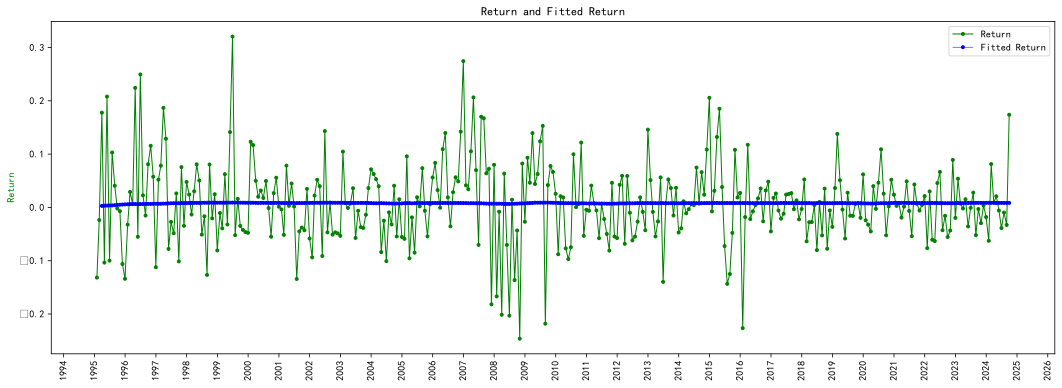

In [44]:
data_fit=reg_data.copy()
data_fit['fitted_return']=model_cpi.fittedvalues

fig,ax1=plt.subplots(figsize=(18,6))#选择图形大小
ax1.plot(data_fit['Raw_return'], #图片数据
    '.-r',#图片类型，
    color='g',#图片颜色
    label='Return',#图片标签
    linewidth=1,
    linestyle='-',
    marker='.')#图片线宽
ax1.plot(data_fit['fitted_return'], #图片数据
    '.-r',#图片类型，
    color='b',#图片颜色
    label='Fitted Return',#图片标签
    linewidth=0.5,
    linestyle='-',)#图片线宽
ax1.set_ylabel('Return',color='g')

#设置x轴的日期显示格式
data_format=mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator(1))

#转制x轴的日期显示格式
plt.xticks(rotation=90)
plt.title('Return and Fitted Return')
plt.legend(loc='upper right')

#  季度结果

In [45]:
Q_reg_data=reg_data.resample('QE').apply({
    'Raw_return':lambda x:(1+x).prod()-1,
    'cpi':lambda x:sum(x)
})
Q_reg_data

,Raw_return,cpi
1995-03-31,-0.001466,6.780000e+01
1995-06-30,-0.025258,5.920000e+01
1995-09-30,0.145660,4.440000e+01
1995-12-31,-0.231358,3.340000e+01
1996-03-31,0.001981,2.810000e+01
...,...,...
2023-09-30,-0.028603,-2.000000e-01
2023-12-31,-0.043575,-1.000000e+00
2024-03-31,0.022263,-8.326673e-17
2024-06-30,-0.024255,8.000000e-01


In [46]:
Q_reg_data['lcpi']=Q_reg_data['cpi'].shift(2)/100
model_cpi_q=smf.ols('Raw_return~lcpi',data=Q_reg_data).fit()
print(model_cpi_q.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.1027
Date:                Wed, 30 Oct 2024   Prob (F-statistic):              0.749
Time:                        17:05:54   Log-Likelihood:                 55.652
No. Observations:                 117   AIC:                            -107.3
Df Residuals:                     115   BIC:                            -101.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0281      0.017      1.628      0.1

$$
R_t=0.0419-0.4308^{*}*CPI_{t-1}
$$

# 季度的图

C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_27576\1265342908.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-r" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(Q_reg_data['Raw_return'], #图片数据
C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_27576\1265342908.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-r" (-> marker='.'). The keyword argument will take precedence.
  ax1.plot(Q_reg_data['Raw_return'], #图片数据
C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_27576\1265342908.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".-r" (-> color='r'). The keyword argument will take precedence.
  ax1.plot(Q_reg_data['Raw_return'], #图片数据
C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_27576\1265342908.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-r" (-

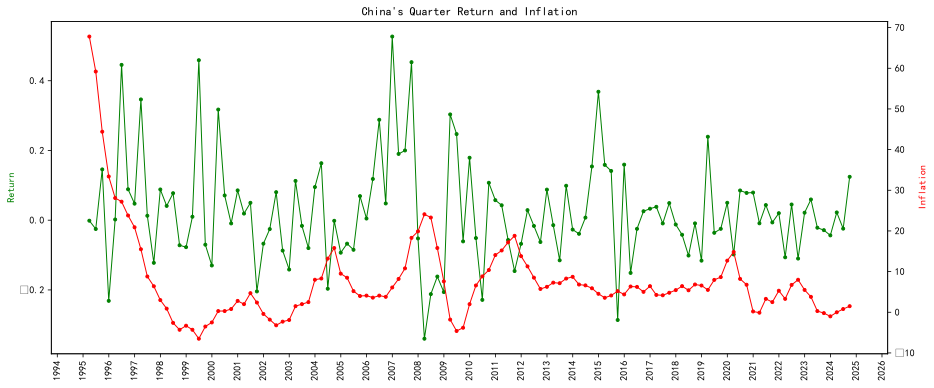

In [47]:
fig=plt.figure(figsize=(15,6))#选择图形大小
ax1=fig.add_subplot(1,1,1)#(行，列，索引)

ax1.plot(Q_reg_data['Raw_return'], #图片数据
    '.-r',#图片类型，
    color='g',#图片颜色
    label='Return',#图片标签
    linewidth=1,
    linestyle='-',
    marker='.')#图片线宽
ax1.set_ylabel('Return',color='g')

#设置x轴的日期显示格式
data_format=mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
#转制x轴的日期显示格式
plt.xticks(rotation=90)

ax2=ax1.twinx()
ax2.plot(Q_reg_data['cpi'], #图片数据
    '.-r',#图片类型，
    color='r',#图片颜色
    label='Inflation',#图片标签
    linewidth=1,
    linestyle='-',
    marker='.')#图片线宽
ax2.set_ylabel('Inflation',color='r')

plt.title("China's Quarter Return and Inflation")
lines,labels=ax1.get_legend_handles_labels()
lines2,labels2=ax2.get_legend_handles_labels()
ax.legend(lines+lines2,labels+labels2,loc='upper right')

plt.show();

